# 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite
auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


1. Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung
über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [52]:
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))
X.shape

(200, 2)

2. Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [53]:
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_train = X
y_train = y_ges

3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

In [54]:
# Testmatrix erzeugen
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))

# Klassenlabels entsprechend Quadrant vergeben
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1 

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_test = X
y_test = y_ges

y_train_reshaped = np.reshape(y_train,(200,1))
y_test_reshaped = np.reshape(y_test,(200,1))

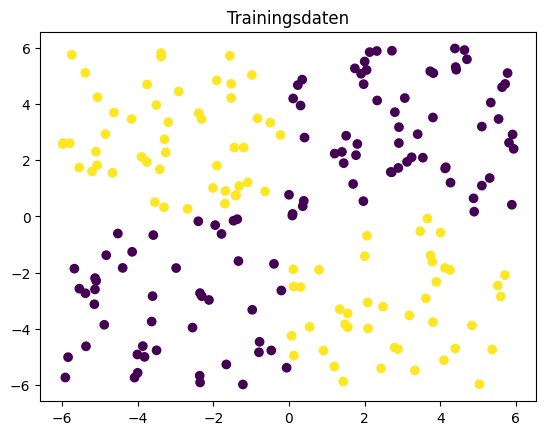

In [55]:
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

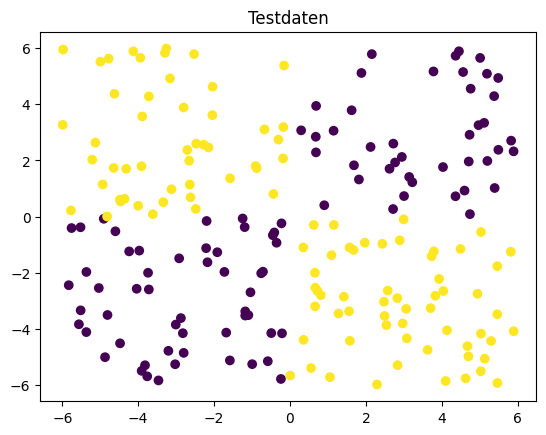

In [56]:
plt.title("Testdaten")
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [57]:
# Zwei eindimensionale Eingangswerte: Der Gewichtsvektor hat die Form (2, 1).
w1 = np.array([1,0])
w2 = np.array([0,1])
print(np.array([w1, w2]))

[[1 0]
 [0 1]]


In [58]:

# Define the sigmoid activation function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define tanh activation function
def tanh(z):
    return np.tanh(z)

global activationType
activationType = "sigmoid"

# Select the activation function
def activationFunction(z, type="sigmoid"):
    if type == "sigmoid":
        return sigmoid(z)
    elif type == "tanh":
        return tanh(z)

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung des tanh
def tanh_prime(z):
    """Derivative of the tanh function."""
    return 1 - tanh(z)**2

# Select the derivative of the activation function
def activation_prime(z, type="sigmoid"):
    if type == "sigmoid":
        return sigmoid_prime(z)
    elif type == "tanh":
        return tanh_prime(z)

5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

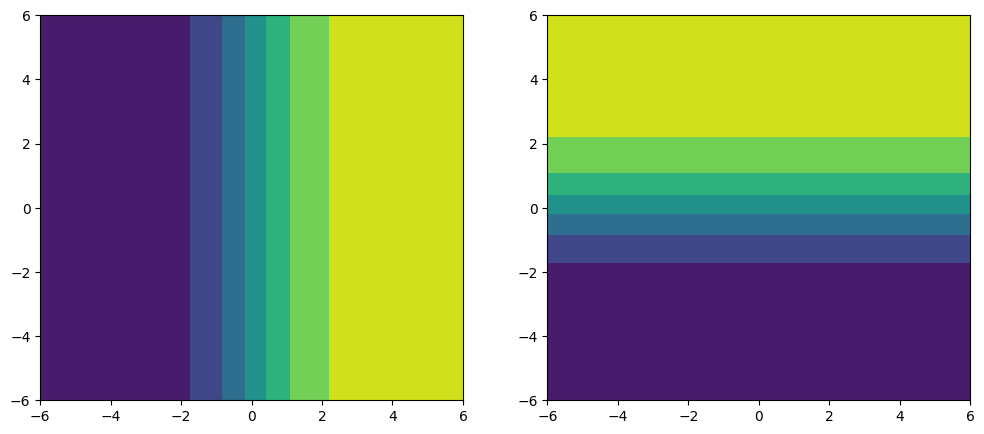

In [59]:
# Gitter erstellen
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Neuron 1: teilt die Inputebene waagrecht entlang der x-Achse
z_xx1 = x_grid
neuron1 = activationFunction(z_xx1,activationType)

# Neuron 2: teilt die Inputebene senkrecht entlang der y-Achse
z_xx2 = y_grid
neuron2 = activationFunction(z_xx2,activationType)

# Darstellung der Ergebnisse als Farbbilder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, neuron1)

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, neuron2)

plt.show()

6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings und
Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende
Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [60]:
def BerechneNeuronenOutput(w, X):
    return sigmoid(np.dot(X, w.T))

train_design_matrix = np.zeros((len(X_train), 2))
for index, x in enumerate(X_train):
    train_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    train_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)
print('Size of Train Data Layer 1: ', train_design_matrix.shape)

test_design_matrix = np.zeros((len(X_test), 2))
for index, x in enumerate(X_test):
    test_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    test_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)
print('Size of Test Data Layer 1: ', test_design_matrix.shape)

grid_design_matrix = np.zeros((2, 100*100))
step = 12/100
index = 0
for x in np.arange(-6, 6, step):
    for y in np.arange(-6, 6, step):
        input = np.array([x, y])
        grid_design_matrix[0, index] = BerechneNeuronenOutput(w1, input)
        grid_design_matrix[1, index] = BerechneNeuronenOutput(w2, input)
        index += 1
print('Size of Grid Matrix: ', grid_design_matrix.shape)

Size of Train Data Layer 1:  (200, 2)
Size of Test Data Layer 1:  (200, 2)
Size of Grid Matrix:  (2, 10000)


# 2. Training eines MLPs auf den Spielzeugdaten
Der Code aus dem Beispielnotebook muss zunächst an das Szenario aus der Vorlesung angepasst
werden: ein deutlich kleineres Netzwerk mit eindimensionalem statt zehndimensionalem
Output.

1. Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2
Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron
haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf
Korrektheit.

In [61]:
# Netzwerkparameter
def setNetworkParams(miniBatchSize, learningRate, networkSizeArray, numberOfEpochs):
    global mbs, eta, sizes, epochs, biases, weights, num_layers
    mbs = miniBatchSize                   # Größe der Minibatches
    eta = learningRate                  # Lernrate
    # Die erste eigentliche Input Schicht enfällt das diese mit festen Gewichten verbunden ist
    sizes = networkSizeArray         # Anzahl Neuronen pro Schicht (Input, Hidden, Output)
    num_layers = len(sizes)     # Anzahl Schichten
    epochs = numberOfEpochs               # Anzahl Epochen
    # Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
    biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
    weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
    print(weights[1].shape)

global lossFunctionType
lossFunctionType = "mse"

# Netzwerkparameter setzen
setNetworkParams(10, 0.03, [2, 2, 1], 150)

(1, 2)


2. Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen
daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt
klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1
größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf
uns speichern Sie diesen in einem zusätzlichen Array ab.

In [62]:
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = activationFunction(np.dot(w, a)+b, activationType)
    return a

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result and calculate the Mean Squared Error (MSE)."""
    
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    loss = []     # loss by MSE or logistic regression
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        
        ## Label ist in one-hot-Codierung (Index der Testdaten = Klassenzugehörigkeit): korrekte Klasse ist 1, alle anderen 0
        #c = np.argmax(y)
        #
        ## Index des maximal aktivierten Outputs ist die Entscheidung des Netzwerk
        #cpred = np.argmax(ypred)
        #
        ## Falls beide übereinstimmen, addiere zur Gesamtzahl
        #if c == cpred:
        #    correct += 1

        if(activationType == "sigmoid"):
            # Klassifizierung auf Basis des MLP Wahrschenlichkeitsoutputs bei sigmoid Aktivierung
            if np.all(y == 0) and np.all(ypred < 0.5):
                correct += 1
            elif np.all(y == 1) and np.all(ypred >= 0.5):
                correct += 1
        elif(activationType == "tanh"):
            # Klassifizierung auf Basis des MLP Wahrscheinlichkeitsoutputs bei tanh Aktivierung
            if np.all(y == 0) and np.all(ypred < 0):
                correct += 1
            elif np.all(y == 1) and np.all(ypred >= 0):
                correct += 1

        if lossFunctionType == "mse":
            # Berechnung Squared Error
            loss.append((y - ypred)**2)
        elif lossFunctionType == "log":
            # Calculate logistic regression loss
            loss.append(-y * np.log(np.nan_to_num(ypred)) - (1 - y) * np.log(np.nan_to_num(1 - ypred)))

    loss = np.mean(loss)

    return correct, loss

In [63]:
# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y, lossFunctionType="mse"):
    #Return the vector of partial derivatives \partial C_x /partial a for the output activations.
    if lossFunctionType == "mse":
        return (output_activations-y)
    # Return the vector of partial derivatives ∇aC for the output activations.
    elif lossFunctionType == "log":
        return (output_activations - y) / (output_activations * (1 - output_activations))

In [64]:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b # z=w*x+b
        zs.append(z)
        activation = activationFunction(z,activationType)     # Sigmoide Aktivierungsfunktion
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y, lossFunctionType) * activation_prime(zs[-1], activationType) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    # !!! Deshalb effizient: Gewichte eines Layers werden gleichzeitig aktualisiert durch Matrixmultiplikation
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = activation_prime(z, activationType) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

In [65]:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf (alter Wert + Delta (Fehler))
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

In [66]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("Epoch {0}: {1} / {2} -- {3}".format(j, acc_val[j], n_test, mse[j]))

    return acc_val, mse

In [67]:
def trainNetwork():
    training_accuracies = []
    test_accuracies = []
    training_losses = []
    test_losses = []
    n = train_design_matrix.shape[0]

    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(n)
        shuffled_design_matrix = train_design_matrix[indices,:]
        shuffled_labels = y_train[indices]

        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mbs):
            xmb = shuffled_design_matrix[k:k+mbs,:]
            ymb = shuffled_labels[k:k+mbs]
            update_mini_batch(xmb, ymb, eta)

        # Evaluate the network on the training data
        training_correct, training_loss = evaluate(train_design_matrix, y_train)
        training_accuracy = training_correct / n
        training_accuracies.append(training_accuracy)
        training_losses.append(training_loss)

        # Evaluate the network on the test data
        test_correct, test_loss = evaluate(test_design_matrix, y_test)
        test_accuracy = test_correct / n
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)

        # Gib Performance aus
        print("Epoch {0}: {1} / {2} -- {3}".format(epoch, training_correct, n, training_loss))

    return training_accuracies, test_accuracies, training_losses, test_losses

In [68]:
def plotLearningCurve(training_accuracies, test_accuracies, training_loss, test_loss, epochs):
    # Plot the learning curves
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), training_accuracies, label='Training')
    plt.plot(range(epochs), test_accuracies, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Learning Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), training_loss, label='Training')
    plt.plot(range(epochs), test_loss, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss/ Learning Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Berechnung von y_pred bei Eingabe der Werte aus grid_design_matrix (grid_design_matrix.shape[1],1)
def plotDecisionFunction():    
    # Get predictions for each point in the meshgrid
    predictions = feedforward(grid_design_matrix)

    # Reshape predictions to match the shape of the meshgrid
    predictions = predictions.reshape(100,100)

    plt.figure(figsize=(30, 5))
    plt.subplot(1, 3, 3)
    # Plot the decision boundary using imshow
    plt.imshow(predictions, extent=(-6, 6, -6, 6), origin='lower', cmap='viridis')

    # Add scatter plot of training data points if available
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')

    plt.title('Neural Network Decision Boundaries')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Activation')
    plt.show()

3. Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es
auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar.
Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung
zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher
mehrere Male und vergeleichen Sie die Ergebnisse.

In [88]:
activationType = "sigmoid"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,2,1], 150)
training_accuracies, test_accuracies, training_losses, test_losses = trainNetwork()

(1, 2)
Epoch 0: 109 / 200 -- 0.2553648319645725
Epoch 1: 109 / 200 -- 0.25449483964529185
Epoch 2: 109 / 200 -- 0.25373500570014085
Epoch 3: 109 / 200 -- 0.25304871175446314
Epoch 4: 109 / 200 -- 0.2524497088654806
Epoch 5: 109 / 200 -- 0.25190478027564145
Epoch 6: 109 / 200 -- 0.25141992418260345
Epoch 7: 109 / 200 -- 0.25098748605074306
Epoch 8: 109 / 200 -- 0.2505973000741397
Epoch 9: 109 / 200 -- 0.2502416282302785
Epoch 10: 109 / 200 -- 0.24993098296684033
Epoch 11: 109 / 200 -- 0.24964834597268923
Epoch 12: 109 / 200 -- 0.24937777640481015
Epoch 13: 109 / 200 -- 0.2491347782190093
Epoch 14: 109 / 200 -- 0.2489181930840583
Epoch 15: 109 / 200 -- 0.24871155762483163
Epoch 16: 109 / 200 -- 0.24852219336480416
Epoch 17: 109 / 200 -- 0.24834293022063952
Epoch 18: 109 / 200 -- 0.24817708061238114
Epoch 19: 109 / 200 -- 0.24802194106871325
Epoch 20: 109 / 200 -- 0.2478728685131955
Epoch 21: 109 / 200 -- 0.2477371878528384
Epoch 22: 109 / 200 -- 0.24760248250583067
Epoch 23: 111 / 200 --

4. Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

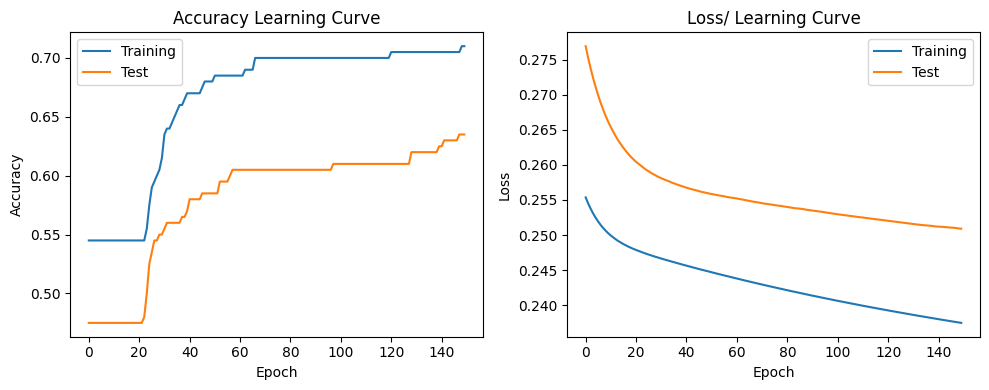

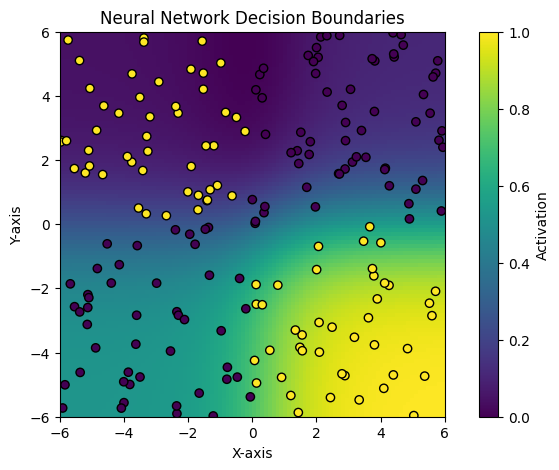

In [89]:
plotLearningCurve(training_accuracies, test_accuracies, training_losses, test_losses, epochs)
plotDecisionFunction()

# 3. Nachvollziehen der Beispiele aus der Vorlesung

Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus
(np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend
an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir
werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh
im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate()
entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

(1, 2)
Epoch 0: 109 / 200 -- 0.2871674730566962
Epoch 1: 109 / 200 -- 0.2847257162936635
Epoch 2: 109 / 200 -- 0.2823692046195724
Epoch 3: 109 / 200 -- 0.2801010620249783
Epoch 4: 109 / 200 -- 0.2779333751109975
Epoch 5: 109 / 200 -- 0.27586731862189784
Epoch 6: 109 / 200 -- 0.27390219822394357
Epoch 7: 109 / 200 -- 0.27203392732247705
Epoch 8: 109 / 200 -- 0.2702608086500333
Epoch 9: 109 / 200 -- 0.26859414057906067
Epoch 10: 109 / 200 -- 0.2670260134751381
Epoch 11: 109 / 200 -- 0.2655460032276874
Epoch 12: 109 / 200 -- 0.26416678261336757
Epoch 13: 109 / 200 -- 0.2628678171214593
Epoch 14: 109 / 200 -- 0.26165085729531795
Epoch 15: 109 / 200 -- 0.26052273944329907
Epoch 16: 109 / 200 -- 0.25946795348987073
Epoch 17: 109 / 200 -- 0.2584908606712632
Epoch 18: 109 / 200 -- 0.25758453943287646
Epoch 19: 109 / 200 -- 0.25674776242909203
Epoch 20: 109 / 200 -- 0.25597695059635617
Epoch 21: 109 / 200 -- 0.2552633078356672
Epoch 22: 109 / 200 -- 0.25460387287348774
Epoch 23: 109 / 200 -- 0.

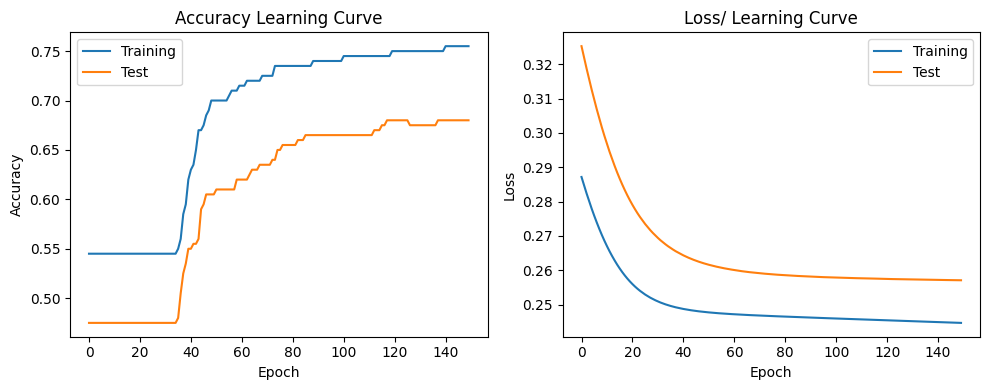

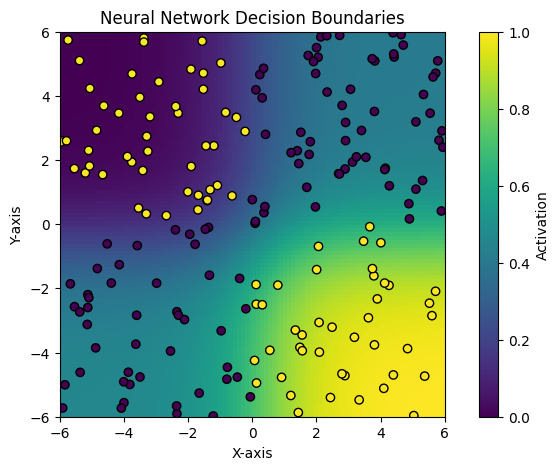

In [71]:
activationType = "sigmoid"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,2,1], 150)
training_accuracies, test_accuracies, training_losses, test_losses = trainNetwork()
plotLearningCurve(training_accuracies, test_accuracies, training_losses, test_losses, epochs)
plotDecisionFunction()

(1, 3)
Epoch 0: 91 / 200 -- 0.3014994576685804
Epoch 1: 91 / 200 -- 0.28841969773528364
Epoch 2: 91 / 200 -- 0.2780241919045974
Epoch 3: 91 / 200 -- 0.2701950700881032
Epoch 4: 91 / 200 -- 0.26430676873488745
Epoch 5: 91 / 200 -- 0.2597822531305278
Epoch 6: 91 / 200 -- 0.2554434418156521
Epoch 7: 91 / 200 -- 0.25192225574787536
Epoch 8: 91 / 200 -- 0.24936790285865082
Epoch 9: 91 / 200 -- 0.24764066582816638
Epoch 10: 91 / 200 -- 0.24574643876964872
Epoch 11: 91 / 200 -- 0.24398193782064634
Epoch 12: 91 / 200 -- 0.24269015268641167
Epoch 13: 91 / 200 -- 0.2416195211266813
Epoch 14: 91 / 200 -- 0.24048326609473428
Epoch 15: 91 / 200 -- 0.24033955764062576
Epoch 16: 91 / 200 -- 0.23844337017604234
Epoch 17: 91 / 200 -- 0.23752732436274726
Epoch 18: 91 / 200 -- 0.2367197521647423
Epoch 19: 91 / 200 -- 0.23575786082558384
Epoch 20: 91 / 200 -- 0.23491560006968903
Epoch 21: 91 / 200 -- 0.23409064459249898
Epoch 22: 91 / 200 -- 0.23354374492089158
Epoch 23: 91 / 200 -- 0.23243170396688215
Ep

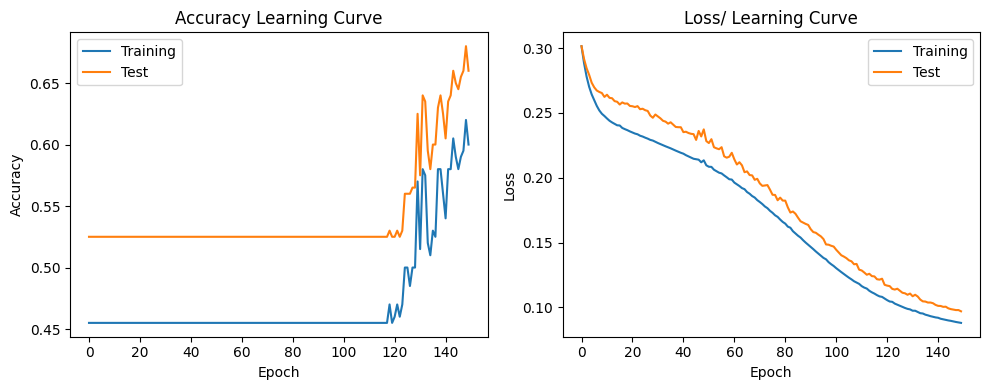

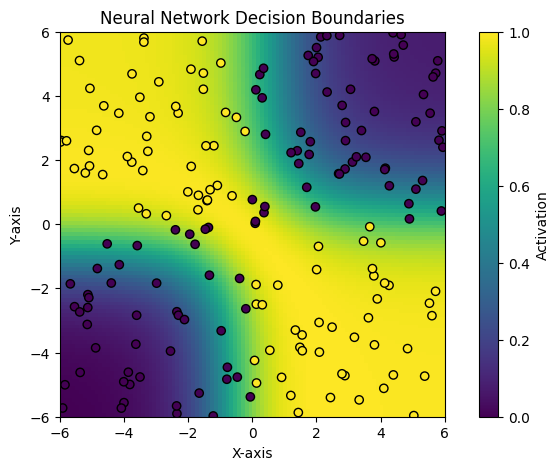

In [76]:
activationType = "tanh"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,3,1], 150)
training_accuracies, test_accuracies, training_losses, test_losses = trainNetwork()
plotLearningCurve(training_accuracies, test_accuracies, training_losses, test_losses, epochs)
plotDecisionFunction()

(1, 2)
Epoch 0: 91 / 200 -- 0.4941742944409742
Epoch 1: 91 / 200 -- 0.4866020817265669
Epoch 2: 91 / 200 -- 0.4768236395283419
Epoch 3: 91 / 200 -- 0.46395246576436944
Epoch 4: 91 / 200 -- 0.44670451366040276
Epoch 5: 91 / 200 -- 0.42353509978065346
Epoch 6: 91 / 200 -- 0.3927951975382129
Epoch 7: 91 / 200 -- 0.35501965848863043
Epoch 8: 91 / 200 -- 0.31680670365506364
Epoch 9: 91 / 200 -- 0.28579832784024184
Epoch 10: 91 / 200 -- 0.2697134433579034
Epoch 11: 91 / 200 -- 0.2609299013567138
Epoch 12: 91 / 200 -- 0.2551749875018912
Epoch 13: 91 / 200 -- 0.2511067010072201
Epoch 14: 91 / 200 -- 0.24717121317494353
Epoch 15: 91 / 200 -- 0.2439786197904618
Epoch 16: 91 / 200 -- 0.24124391952027813
Epoch 17: 91 / 200 -- 0.23882384601865803
Epoch 18: 91 / 200 -- 0.23661771759854225
Epoch 19: 91 / 200 -- 0.23474254503989628
Epoch 20: 91 / 200 -- 0.23304671200618818
Epoch 21: 91 / 200 -- 0.23156307788096103
Epoch 22: 91 / 200 -- 0.23024308256099643
Epoch 23: 91 / 200 -- 0.2290203268227262
Epoch

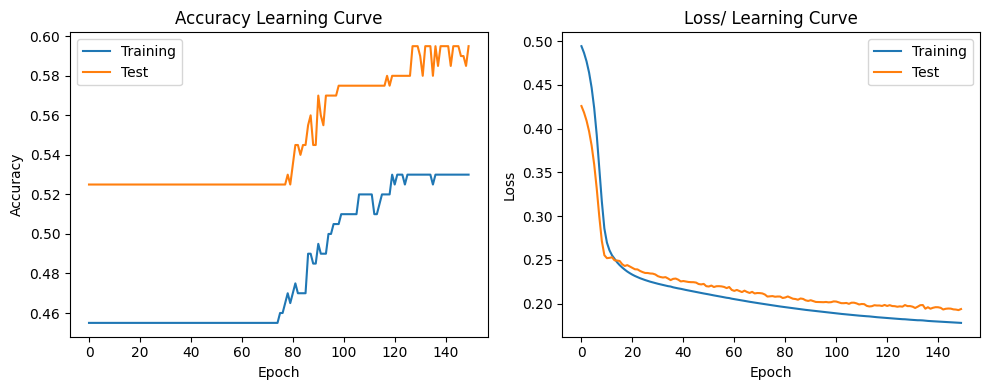

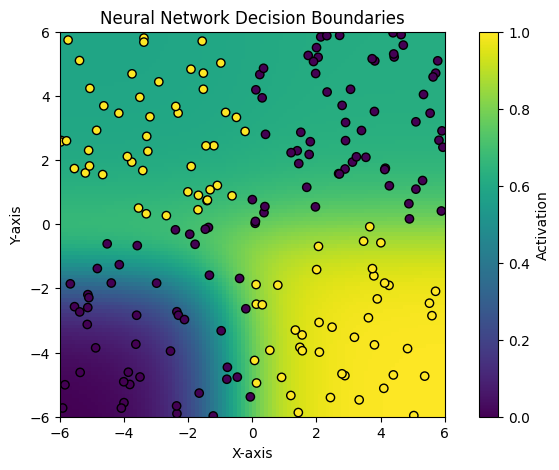

In [73]:
activationType = "tanh"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2, 2, 1], 150)
training_accuracies, test_accuracies, training_losses, test_losses = trainNetwork()
plotLearningCurve(training_accuracies, test_accuracies, training_losses, test_losses, epochs)
plotDecisionFunction()

# 4. Logistische Regression

(1, 2)
Epoch 0: 103 / 200 -- 0.6924464899919542
Epoch 1: 109 / 200 -- 0.6856982428364731
Epoch 2: 125 / 200 -- 0.6839853858914461
Epoch 3: 109 / 200 -- 0.685347861854832
Epoch 4: 68 / 200 -- 0.7025875919067301
Epoch 5: 109 / 200 -- 0.685444637066091
Epoch 6: 121 / 200 -- 0.6828038030712501
Epoch 7: 109 / 200 -- 0.6828319155451068
Epoch 8: 119 / 200 -- 0.6837087240454574
Epoch 9: 114 / 200 -- 0.6820237245661991
Epoch 10: 109 / 200 -- 0.684382925143881
Epoch 11: 118 / 200 -- 0.6842965184588442
Epoch 12: 119 / 200 -- 0.6834077130631451
Epoch 13: 119 / 200 -- 0.6811949253819126
Epoch 14: 109 / 200 -- 0.6810678601655072
Epoch 15: 122 / 200 -- 0.6797682893686336
Epoch 16: 109 / 200 -- 0.6861418841117626
Epoch 17: 139 / 200 -- 0.6786537188844625
Epoch 18: 131 / 200 -- 0.6786755487160875
Epoch 19: 110 / 200 -- 0.6830865239780755
Epoch 20: 119 / 200 -- 0.6776895048643721
Epoch 21: 109 / 200 -- 0.6803984640295241
Epoch 22: 124 / 200 -- 0.6753985848000048
Epoch 23: 119 / 200 -- 0.6762363223356667

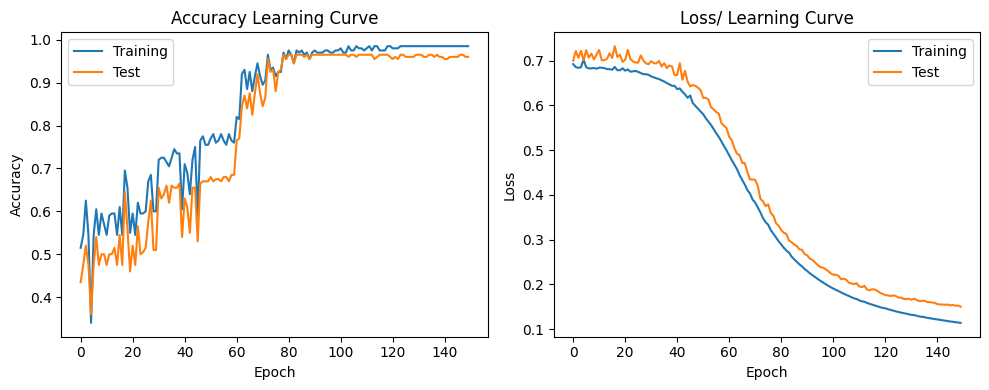

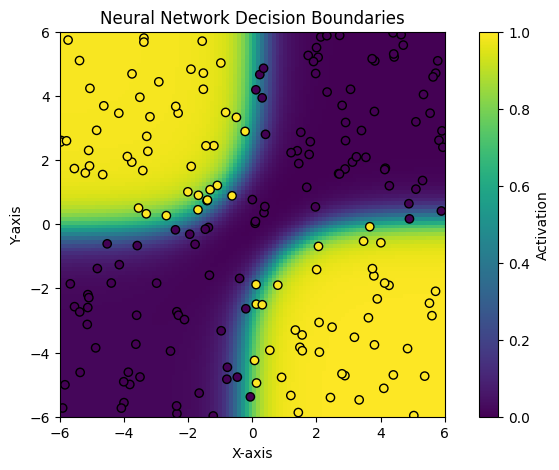

In [74]:
activationType = "sigmoid"
lossFunctionType = "log"
setNetworkParams(10, 0.3, [2, 2, 1], 150)
training_accuracies, test_accuracies, training_losses, test_losses = trainNetwork()
plotLearningCurve(training_accuracies, test_accuracies, training_losses, test_losses, epochs)
plotDecisionFunction()

In [75]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 11 10.0.22621 SP0
Tue Dec 19 15:42:29 2023 Mitteleuropäische Zeit